In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

In [17]:
df = df.dropna()

In [18]:
df.var().sort_values(ascending=False)

cookie_id      8.333417e+08
Topic63_ec     6.155122e+03
Topic52_ec     4.236199e+03
Topic42_ec     3.855324e+03
Topic33_ec     3.570435e+03
                   ...     
Topic173_ic    0.000000e+00
Topic171_ec    0.000000e+00
Topic171_ic    0.000000e+00
Topic170_ec    0.000000e+00
Topic170_ic    0.000000e+00
Length: 258, dtype: float64

In [19]:
y = df['target']

In [20]:
df = df[df.var().sort_values(ascending=False).index[:100]]

In [21]:
X = df.drop(['cookie_id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # for feature selection

Feature ranking:
1. Feature 2 (0.041945) Topic42_ec
2. Feature 0 (0.037054) Topic63_ec
3. Feature 12 (0.035409) Topic12_ec
4. Feature 41 (0.032819) Topic51_ec
5. Feature 8 (0.027528) Topic13_ec
6. Feature 47 (0.026923) Topic13_ic
7. Feature 7 (0.026315) Topic4_ec
8. Feature 56 (0.024807) Topic56_ic
9. Feature 9 (0.024732) Topic14_ec
10. Feature 27 (0.023382) Topic55_ic
11. Feature 42 (0.023350) Topic4_ic
12. Feature 28 (0.021536) Topic54_ec
13. Feature 19 (0.021511) Topic56_ec
14. Feature 20 (0.020063) Topic55_ec
15. Feature 46 (0.019652) Topic14_ic
16. Feature 22 (0.019427) Topic3_ic
17. Feature 38 (0.018576) Topic137_ec
18. Feature 58 (0.018444) Topic19_ic
19. Feature 62 (0.017763) Topic12_ic
20. Feature 26 (0.017526) Topic24_ec
21. Feature 10 (0.017135) Topic74_ec
22. Feature 6 (0.015674) Topic19_ec
23. Feature 3 (0.015335) Topic33_ec
24. Feature 1 (0.015324) Topic52_ec
25. Feature 45 (0.014772) Topic9_ec
26. Feature 33 (0.013863) Topic41_ec
27. Feature 74 (0.013832) Topic24_ic
28. 

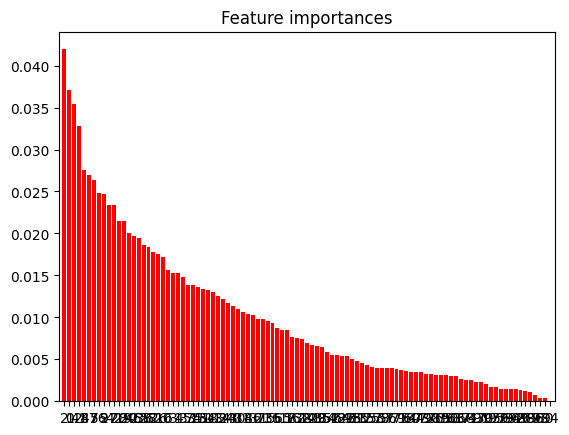

In [22]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. Feature 0 (0.030927) Topic63_ec
2. Feature 7 (0.030493) Topic4_ec
3. Feature 12 (0.029783) Topic12_ec
4. Feature 27 (0.027923) Topic55_ic
5. Feature 2 (0.027629) Topic42_ec
6. Feature 9 (0.027300) Topic14_ec
7. Feature 42 (0.027171) Topic4_ic
8. Feature 8 (0.026654) Topic13_ec
9. Feature 62 (0.025896) Topic12_ic
10. Feature 47 (0.025612) Topic13_ic
11. Feature 19 (0.024546) Topic56_ec
12. Feature 56 (0.024498) Topic56_ic
13. Feature 41 (0.024423) Topic51_ec
14. Feature 28 (0.024102) Topic54_ec
15. Feature 46 (0.024079) Topic14_ic
16. Feature 20 (0.020283) Topic55_ec
17. Feature 22 (0.020108) Topic3_ic
18. Feature 6 (0.017726) Topic19_ec
19. Feature 58 (0.017285) Topic19_ic
20. Feature 10 (0.015826) Topic74_ec
21. Feature 1 (0.015504) Topic52_ec
22. Feature 13 (0.015472) Topic65_ec
23. Feature 14 (0.015168) Topic1_ec
24. Feature 26 (0.014821) Topic24_ec
25. Feature 54 (0.013591) Topic9_ic
26. Feature 51 (0.013262) Topic15_ic
27. Feature 83 (0.013161) Topic10_ic
28. F

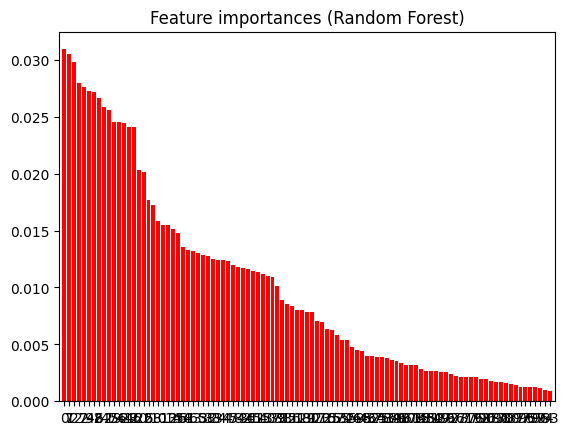

In [23]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [24]:
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0         2       0.041945       0.027629
1         0       0.037054       0.030927
2        12       0.035409       0.029783
3        41       0.032819       0.024423
4         8       0.027528       0.026654
..      ...            ...            ...
94       67       0.001059       0.001226
95       96       0.000710       0.001169
96       93       0.000365       0.000903
97       80       0.000350       0.001516
98       94       0.000000       0.000978

[99 rows x 3 columns]


In [25]:
percentile_threshold = 0.5

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)

Threshold value based on the top 50 percentileDT: 0.006957075755874992 percentileRF: 0.007881610201006842


In [26]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0         2       0.041945       0.027629
1         0       0.037054       0.030927
2        12       0.035409       0.029783
3        41       0.032819       0.024423
4         8       0.027528       0.026654
5        47       0.026923       0.025612
6         7       0.026315       0.030493
7        56       0.024807       0.024498
8         9       0.024732       0.027300
9        27       0.023382       0.027923
10       42       0.023350       0.027171
11       28       0.021536       0.024102
12       19       0.021511       0.024546
13       20       0.020063       0.020283
14       46       0.019652       0.024079
15       22       0.019427       0.020108
16       38       0.018576       0.012754
17       58       0.018444       0.017285
18       62       0.017763       0.025896
19       26       0.017526       0.014821
20       10       0.017135       0.015826
21        6       0.015674       0.017726
22    

In [27]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)

In [28]:
column_names = list(X.columns)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the base classifiers
base_rf = RandomForestClassifier(random_state=42)
base_ada = AdaBoostClassifier(random_state=42)
base_gb = GradientBoostingClassifier(random_state=42)

# Create a pipeline for each classifier with preprocessing
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', base_rf)])

pipeline_ada = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', base_ada)])

pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', base_gb)])

# Parameter grids for hyperparameter tuning
param_grid_rf = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [10, 12, 15],
    'classifier__max_features': ['sqrt', 'log2']
}

param_grid_ada = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__learning_rate': [0.5, 1.0, 1.5]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}


In [31]:
# Grid search for each classifier
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, n_jobs=-1, verbose=2)
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, n_jobs=-1, verbose=2)

In [32]:
# Fit the grid searches
grid_search_rf.fit(X_train, y_train)
grid_search_ada.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100; total time=  20.2s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100; total time=  20.4s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100; total time=  20.4s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100; total time=  20.4s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100; total time=  20.4s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150; total time=  28.7s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150; total time=  28.9s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150; total time=  28.8s
[CV] END classifier

/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=  25.0s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=  25.0s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=  25.1s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=  25.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=  25.2s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=0.5, classifier__n_estimators=150; total time=  37.9s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=150; total time=  38.1s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=150; total time=  38.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=150; total time=  38.3s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=150; total time=  38.5s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=0.5, classifier__n_estimators=200; total time=  50.9s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=200; total time=  51.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=  26.8s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=  26.8s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=  26.2s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=  26.3s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=  26.1s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=0.5, classifier__n_estimators=200; total time=  52.3s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=200; total time=  52.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=200; total time=  52.2s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=150; total time=  39.6s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=150; total time=  39.4s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=1.0, classifier__n_estimators=150; total time=  38.6s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=150; total time=  38.7s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=150; total time=  38.5s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=1.5, classifier__n_estimators=100; total time=  25.7s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=100; total time=  25.8s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=  51.2s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=100; total time=  25.7s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=100; total time=  25.8s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=  51.0s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=  51.2s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=  51.2s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=100; total time=  26.2s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=  49.2s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=150; total time=  37.5s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=150; total time=  37.3s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=150; total time=  31.8s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=150; total time=  31.9s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=150; total time=  31.8s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=200; total time=  36.0s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=200; total time=  36.0s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=200; total time=  28.1s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=200; total time=  27.8s
[CV] END classifier__learning_rate=1.5, classifier__n_estimators=200; total time=  27.8s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=  44.8s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=  44.9s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=  44.9s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=  45.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=  45.1s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=150; total time= 1.1min
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=150; total time= 1.1min
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=150; total time= 1.1min
[CV] END classifie

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Topic63_ec', 'Topic52_ec', 'Topic42_ec', 'Topic33_ec', 'Topic5_ec',
       'Topic8_ec', 'Topic19_ec', 'Topic4_ec', 'Topic13_ec', 'Topic14_ec',
       'Topic74_ec', 'Topic2_ec', '...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 150, 200]},
             verbose=2)

In [33]:
# Get the best models
best_rf = grid_search_rf.best_estimator_
best_ada = grid_search_ada.best_estimator_
best_gb = grid_search_gb.best_estimator_

In [34]:
# Voting classifier with best models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('ada', best_ada),
        ('gb', best_gb),
    ],
    voting='soft',
    verbose=True
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Accuracy (Voting Classifier):", accuracy_voting)

[Voting] ....................... (1 of 3) Processing rf, total=   5.4s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[Voting] ...................... (2 of 3) Processing ada, total=   7.8s
[Voting] ....................... (3 of 3) Processing gb, total=  20.4s
Accuracy (Voting Classifier): 0.98525


In [35]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

In [38]:

X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test[column_names]

y_pred = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_result.csv', index=False)